In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
cdf= pd.read_csv('/kaggle/input/titanic/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
cdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train=df[['PassengerId', 'Survived','Pclass', 'Sex', 'Age','SibSp','Parch']]
test=cdf[['PassengerId','Pclass', 'Sex','Age', 'SibSp','Parch']]

In [5]:
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
train

/tmp/ipykernel_18/2226700247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,NaN,1,2
889,890,1,1,1,26.0,0,0


In [6]:
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})
test

/tmp/ipykernel_18/3086422552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})


,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0
414,1306,1,0,39.0,0,0
415,1307,3,1,38.5,0,0
416,1308,3,1,NaN,0,0


In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [8]:
# حساب متوسط العمر مع استبعاد القيم الناقصة
mean_age=train['Age'].mean()
print(f'متوسط العمر: {mean_age}')


متوسط العمر: 29.69911764705882


In [9]:
# ملء القيم الناقصة في عمود العمر بالقيمة المتوسطة
train['Age'] = train['Age'].fillna(mean_age)

# التأكد من عدم وجود قيم ناقصة
print(train['Age'].isnull().sum())


0


/tmp/ipykernel_18/3883436323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = train['Age'].fillna(mean_age)


In [10]:
mean_age_after_filling = train['Age'].mean()
print(f'متوسط العمر بعد ملء القيم الناقصة: {mean_age_after_filling}')

متوسط العمر بعد ملء القيم الناقصة: 29.69911764705882


In [11]:
test.isnull().sum()


PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
dtype: int64

In [12]:
# حساب متوسط العمر مع استبعاد القيم الناقصة
mean_age=test['Age'].mean()
print(f'متوسط العمر: {mean_age}')

متوسط العمر: 30.272590361445783


In [13]:
# ملء القيم الناقصة في عمود العمر بالقيمة المتوسطة
test['Age'] = test['Age'].fillna(mean_age)

# التأكد من عدم وجود قيم ناقصة
print(test['Age'].isnull().sum())

0


/tmp/ipykernel_18/2034292607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'] = test['Age'].fillna(mean_age)


In [14]:
mean_age_after_filling = train['Age'].mean()
print(f'متوسط العمر بعد ملء القيم الناقصة: {mean_age_after_filling}')

متوسط العمر بعد ملء القيم الناقصة: 29.69911764705882


In [15]:
test.isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [16]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [17]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

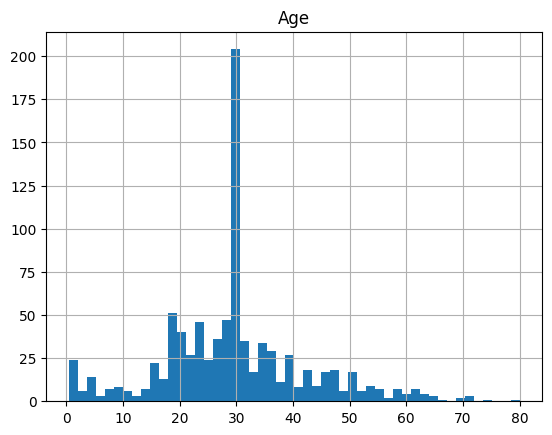

In [18]:
train.hist(column='Age', bins=50)

In [19]:
X = train[['PassengerId', 'Pclass', 'Sex', 'Age','SibSp','Parch']] .values
X[0:5]

array([[ 1.,  3.,  1., 22.,  1.,  0.],
       [ 2.,  1.,  0., 38.,  1.,  0.],
       [ 3.,  3.,  0., 26.,  0.,  0.],
       [ 4.,  1.,  0., 35.,  1.,  0.],
       [ 5.,  3.,  1., 35.,  0.,  0.]])

In [20]:
y = train['Survived'].values
y[0:5]

array([0, 1, 1, 1, 0])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred)}')


Validation Accuracy: 0.8100558659217877


In [23]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_val, y_pred))
print(f'ROC-AUC Score: {roc_auc_score(y_val, y_pred)}')



              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC-AUC Score: 0.7981981981981983


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(f'Best Parameters: {grid.best_params_}')



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'C': 1}


In [25]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age','SibSp','Parch']
X_test = test[features]


In [26]:
X_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [27]:
test_predictions = model.predict(X_test)

submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_predictions})

csv_file_path = 'submission.csv'
submission.to_csv(csv_file_path, index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
